In [42]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report
import torch
from torchvision import datasets, transforms, models

In [43]:
rann = np.random.random()
print(rann)

0.7055660992601758


In [44]:
# Read image filenames from the dataset folders

data_dir = './raw-img'
class_names0 = os.listdir(data_dir)

class_names=[]
for item in class_names0:
    if '.csv' not in item:
        class_names+=[item]
        
num_class = len(class_names)
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]
print(image_files)

[['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', './raw-img\\cane\\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', './raw-img\\cane\\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', './raw-img\\cane\\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', './raw-img\\cane\\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg', './raw-img\\cane\\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.j

In [45]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)
print(image_file_list)

['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', './raw-img\\cane\\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', './raw-img\\cane\\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', './raw-img\\cane\\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', './raw-img\\cane\\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg', './raw-img\\cane\\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jp

In [46]:
image_width, image_height = Image.open(image_file_list[0]).size

print("Total image count:", num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 26179
Image dimensions: 300 x 225
Label names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Label counts: [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


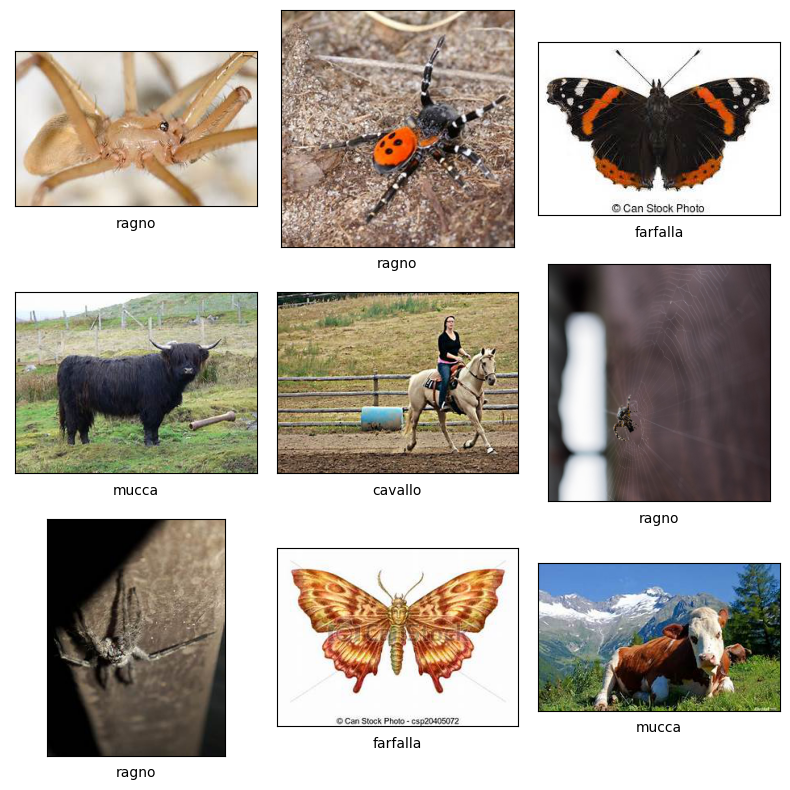

In [48]:
# Visualize some examples

plt.subplots(3, 3, figsize=(8,8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3, 3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [7]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    # Resize the images where the shortest side is 256 pixels, keeping the aspect ratio
    pil_image = Image.open(image)
    width, height = pil_image.size
    aspect_ratio = width / height
    if aspect_ratio > 1:
        pil_image = pil_image.resize((round(aspect_ratio * 256), 256))
    else:
        pil_image = pil_image.resize((256, round(256 / aspect_ratio)))
        
    # Crop out the center 224x224 portion of the image
    width, height = pil_image.size
    new_width = 224
    new_height = 224
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    pil_image = pil_image.crop((round(left), round(top), round(right), round(bottom)))
    
    return pil_image

In [8]:
# Prepare training, validation, and test data lists

valid_frac, test_frac = 0.2, 0.2
trainX, trainY = [], []
valX, valY = [], []
testX, testY = [], []

for i in range(num_total):
    rann = np.random.random()
    if rann < valid_frac:
        valX.append(image_file_list[i])
        valY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_val/{k}/', r))
    elif rann < test_frac + valid_frac:
        testX.append(image_file_list[i])
        testY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_test/{k}/', r))
    else:
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_train/{k}/', r))
print(len(trainX), len(valX), len(testX))
print(trainX)

15654 5236 5289
['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jpeg', './raw-img\\cane\\OIP--AzXmxzRD9y3THnVByTtLwHaG5.jpeg', './raw-img\\cane\\OIP--BKXxWj6jk2y8_PQbxmJ0gHaE9.jpeg', './raw-img\\cane\\OIP--BUglHhzleeaUXxOXNbgRQHaEK.jpeg', './raw-img\\cane\\OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg', './raw-img\\cane\\OIP--DqSseJFuaBH5t89CubEwAHaE8.jpeg', './raw-img\\cane\\OIP--EJV-0S_RAhDQbtUA8HhoAHaGi.jpeg', './raw-img\\cane\\OIP--GnTjiWNoY2Dj

In [49]:
# norm_mean = [0.485, 0.456, 0.406] 
# norm_std = [0.229, 0.224, 0.225] 
train_dir = './animal_train'
val_dir = './animal_val'
test_dir = './animal_test'
batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



# TODO: Load the datasets with imageFolder
image_datasets = {}
image_datasets["train"] = datasets.ImageFolder(root = train_dir, transform=transform)
image_datasets["valid"] = datasets.ImageFolder(root = val_dir, transform=transform)
image_datasets["test"] = datasets.ImageFolder(root = test_dir, transform=transform)

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes

# TODO: Using the image datasets and the transforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(image_datasets["train"], batch_size=batch_size, shuffle = True,
                                          num_workers = 2)
valid_loader = torch.utils.data.DataLoader(image_datasets["valid"], batch_size=batch_size, shuffle = False,
                                          num_workers = 2)
test_loader = torch.utils.data.DataLoader(image_datasets["test"], batch_size=batch_size, shuffle = False,
                                         num_workers = 2)

print(dataset_sizes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

{'train': 15654, 'valid': 5236, 'test': 5289}
cuda:0


In [87]:
import argparse

# TODO: Build and train your network
def prep_model(arch):
    
    vgg16='' 
    alexnet='' 
    densenet161='' 
    resnet18=''
    resnet181=''
    resnet34=''
    resnet50=''
    resnet152=''
    googlenet=''
    
    #Only download the model you need, kill program if one of the three models isn't passed 
    if arch == 'vgg': 
        vgg16 = models.vgg16(pretrained=True) 
        
    elif arch == 'alexnet': 
        alexnet = models.alexnet(pretrained=True) 
        
    elif arch == 'densenet': 
        densenet161 = models.densenet161(pretrained=True) 
    
    elif '18' in arch:
        resnet18 = models.resnet181(pretrained=True)
        
    elif arch == 'resnet181':
        resnet181 = models.resnet181(pretrained=True)
        
    elif arch == 'resnet34':
        resnet34 = models.resnet34(pretrained=True)
        
    elif arch == 'resnet50':
        resnet50 = models.resnet50(pretrained=True)
        
    elif arch == 'resnet152':
        resnet152 = models.resnet152(pretrained=True)
        
    elif arch == 'googlenet':
        googlenet = models.googlenet(pretrained=True)
        
    else: 
        print('{} architecture not recognized. Supported args: \'vgg\', \'alexnet\', \'densenet\', \'resnet\', \'googlenet\''.format(arch)) 
        sys.exit() 
    
    
     
    #Pass the model, and grab the input size 
    model_select = {'vgg':vgg16,'alexnet':alexnet,'densenet':densenet161,'resnet18':resnet18,'resnet181':resnet181,
                    'resnet34':resnet34,'resnet50':resnet50,'resnet152':resnet152,'googlenet':googlenet} 
    input_size = {'vgg':25088,'alexnet':9216,'densenet':2208,
                  'resnet18':512,'resnet181':512,'resnet34':2048,
                  'resnet50':2048,'resnet152':2048,'googlenet':1024} 
    return model_select[arch], input_size[arch] 
parser = argparse.ArgumentParser()
save_dir = input("Write saved file name: ")
arch = input("Choose one model you like among vgg, alexnet, densenet, resnet, or googlenet?: ")
lr = input("Write learning rate: ")
hiddenunits = input("Write hidden units: ")
e = input("Write training epochs: ")
g = input("Please type gpu ('store_true' or 'store_false'): ")
parser.add_argument('-save_dir', action="store", dest="save_dir")
parser.add_argument('-arch', action="store", dest="arch")
parser.add_argument('-learningrate', action="store", dest="learningrate", type=float)
parser.add_argument('-hiddenunits', action="store", dest="hiddenunits", type=int)
parser.add_argument('-epochs', action="store", dest="epochs", type=int)
parser.add_argument('-gpu', action=g, default=None)
ins=parser.parse_args(['-save_dir', save_dir, '-arch', arch, '-learningrate', lr, '-hiddenunits', hiddenunits, '-epochs', e, '-gpu'])

model_select, input_size = prep_model(ins.arch)

Write saved file name: go_animals
Choose one model you like among vgg, alexnet, densenet, resnet, or googlenet?: densenet
Write learning rate: 0.001
Write hidden units: 1024
Write training epochs: 100
Please type gpu ('store_true' or 'store_false'): store_true


In [88]:
from collections import OrderedDict
import torch.nn as nn

for param in model_select.parameters():
    param.requires_grad = False

# and final output 10, since tht we have 10 kinds of animals. 
classifier = nn.Sequential(OrderedDict([     
                          ('dropout1', nn.Dropout(0.1)),
                          ('fc1', nn.Linear(input_size, ins.hiddenunits)), 
                          ('relu1', nn.ReLU()),
                          ('dropout2', nn.Dropout(0.1)),
                          ('fc2', nn.Linear(ins.hiddenunits, num_class)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

# Replace model's old classifier with the new classifier
model_select.classifier = classifier
classifier

Sequential(
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=2208, out_features=1024, bias=True)
  (relu1): ReLU()
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (output): LogSoftmax(dim=1)
)

In [94]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [89]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

True


In [90]:
import torch.optim as optim

criterion = nn.NLLLoss()

optimizer = optim.Adam(model_select.classifier.parameters(), lr = ins.learningrate)
model_select.cuda()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [91]:
from torch.autograd import Variable
import time

valid_losses=[]
avg_train_losses=[]
avg_valid_losses=[]
train_accuracy=[]
valid_accuracy=[]

class EarlyStopping:
    """If validation loss was not improved, stop the training"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        
    def __call__(self, val_loss, model):
        score = -val_loss
        
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
            
    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss
        

# early_stopping object의 초기화
early_stopping = EarlyStopping(patience = 20, verbose = True)

def validation(model, validloader, criterion):
    test_loss = 0
    accuracy = 0
    
    for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)
        
        output = model(images)
        loss = criterion(output, labels)
        valid_losses.append(loss.item())
        
        probability = torch.exp(output)
        equality = labels.data == probability.max(dim=1)[1]
        accuracy += equality.type(torch.FloatTensor).mean()
    return valid_losses, accuracy

# Training
def train():
    print("Training started...", end="\n\n")
    start_time = time.time()
    iteration=0
    train_losses=[]
    for epoch in range(ins.epochs):
        # Reset variables at 0 epoch
        model_select.train() # Training Mode
        iter_loss=0.0
        correct = 0
        total = 0
        for i,(inputs,labels) in enumerate(train_loader):

            inputs=Variable(inputs)
            labels=Variable(labels)
            #print(labels.size())
            # if CUDA is avaible, shift to GPU (CUDA)
            CUDA=torch.cuda.is_available()
            if CUDA:
                inputs=inputs.cuda()
                labels=labels.cuda()

            optimizer.zero_grad() # clear gradient
            outputs=model_select(inputs)
            loss=criterion(outputs,labels)
            #iter_loss += loss.item() # Accumulate loss
            loss.backward() # backpropagation
            optimizer.step() # update weights
            train_losses.append(loss.item())

            # Save the correct predictions for training data
            _,predicted=torch.max(outputs,1)
            total += labels.size(0)
            correct +=(predicted.cpu()==labels.cpu()).sum()
            iteration +=1

            if (iteration+1) % len(train_loader) == 0:
                model_select.eval()
                with torch.no_grad():
                    validation_losses, validation_accuracy = validation(
                        model_select, valid_loader, criterion
                    )
                train_loss = np.average(train_losses)
                valid_loss = np.average(validation_losses)
                avg_train_losses.append(train_loss)
                avg_valid_losses.append(valid_loss)
                train_accuracy.append(correct/total * 100.)
                valid_accuracy.append(validation_accuracy/len(valid_loader) * 100.)
                print(
                    f"Epoch: {epoch + 1} / {ins.epochs}.."
                    f"Training Loss: {train_loss:.3f}.."
                    f"Training Accuracy: {train_accuracy[-1]:.3f}%.."
                    f"Validation Loss: {valid_loss:.3f}.."
                    f"Validation Accuracy: {valid_accuracy[-1]:.3f}%.."
                )
                
                # clear lists to track next epoch
                train_losses, valid_losses = [], []
                
                model_select.train()
                
        early_stopping(valid_loss, model_select)
        if early_stopping.early_stop:
            print("Early stopping")
            break
                    
    model_select.load_state_dict(torch.load('checkpoint.pt'))
          
    end_time = time.time()
    
    print(f"\nModel took {(end_time - start_time)/3600:.2f} hour(s) to train...")
    return model_select

In [92]:
model_select = train()

Training started...

Epoch: 1 / 100..Training Loss: 0.534..Training Accuracy: 82.839%..Validation Loss: 0.148..Validation Accuracy: 96.085%..
Validation loss decreased (inf --> 0.148370). Saving model ...
Epoch: 2 / 100..Training Loss: 0.382..Training Accuracy: 88.072%..Validation Loss: 0.132..Validation Accuracy: 97.441%..
Validation loss decreased (0.148370 --> 0.131921). Saving model ...
Epoch: 3 / 100..Training Loss: 0.350..Training Accuracy: 89.209%..Validation Loss: 0.127..Validation Accuracy: 97.193%..
Validation loss decreased (0.131921 --> 0.126591). Saving model ...
Epoch: 4 / 100..Training Loss: 0.331..Training Accuracy: 89.509%..Validation Loss: 0.125..Validation Accuracy: 97.288%..
Validation loss decreased (0.126591 --> 0.124927). Saving model ...
Epoch: 5 / 100..Training Loss: 0.309..Training Accuracy: 90.397%..Validation Loss: 0.123..Validation Accuracy: 97.441%..
Validation loss decreased (0.124927 --> 0.123414). Saving model ...
Epoch: 6 / 100..Training Loss: 0.297..T

In [93]:
# Testing
def test(model_select):
    
    class_correct=[0. for i in range(10)] 
    class_total=[0. for i in range(10)]
    testing_loss=0.0
    
    model_select.eval()  # Testing Mode
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            if len(labels.data) != batch_size:
                break
                
            inputs=Variable(inputs)
            labels=Variable(labels)

            CUDA=torch.cuda.is_available()
            if CUDA:
                inputs=inputs.cuda()
                labels=labels.cuda()

            outputs=model_select(inputs)
            loss=criterion(outputs,labels)
            testing_loss += loss.item()*inputs.size(0) 

            _,predicted=torch.max(outputs,1)
            #total += labels.size(0)
            correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
            for i in range(batch_size):
                label = labels.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
                
    testing_loss = testing_loss/len(test_loader)
    print(f'Test Loss: {testing_loss:.6f}\n')
    
    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
            
    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [94]:
test(model_select)

Test Loss: 0.466485

Test Accuracy of     0: 98% (911/927)
Test Accuracy of     1: 96% (510/530)
Test Accuracy of     2: 97% (295/304)
Test Accuracy of     3: 95% (410/428)
Test Accuracy of     4: 97% (623/640)
Test Accuracy of     5: 97% (332/341)
Test Accuracy of     6: 94% (374/396)
Test Accuracy of     7: 94% (316/333)
Test Accuracy of     8: 99% (1004/1011)
Test Accuracy of     9: 98% (371/378)

Test Accuracy (Overall): 97% (5146/5288)


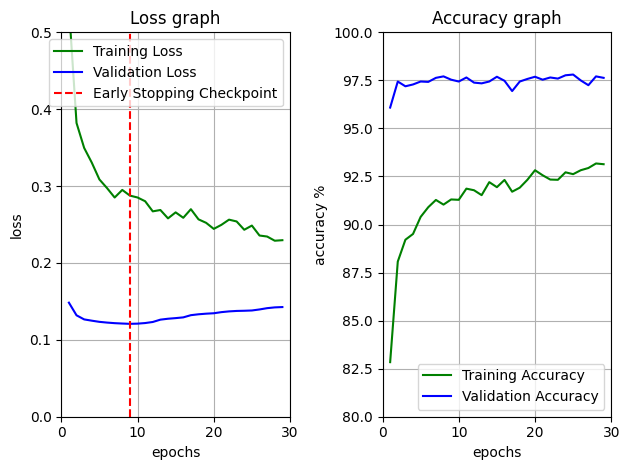

In [108]:
# Visualizing the Loss, Accuracy, and the Early Stopping Checkpoint  
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
#fig1 = plt.figure(figsize=(10,8))
ax1.set_title('Loss graph')
ax1.plot(range(1, len(avg_train_losses)+1), avg_train_losses, 'g', label='Training Loss')
ax1.plot(range(1, len(avg_valid_losses)+1), avg_valid_losses, 'b', label='Validation Loss')
minposs = avg_valid_losses.index(min(avg_valid_losses))+1
ax1.axvline(minposs, linestyle='--', color='r', label='Early Stopping Checkpoint')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 0.5)
ax1.set_xlim(0, len(avg_train_losses)+1)
ax1.grid(True)
ax1.legend(loc = 'upper right')
plt.tight_layout()
#ax1.show()
#fig1.savefig('loss_plot.png', bbox_inches = 'tight')

ax2 = fig.add_subplot(1, 2, 2)
#fig2 = plt.figure(figsize=(10,8))
ax2.set_title('Accuracy graph')
ax2.plot(range(1, len(train_accuracy)+1), train_accuracy, 'g', label='Training Accuracy') 
ax2.plot(range(1, len(valid_accuracy)+1), valid_accuracy, 'b', label='Validation Accuracy')
#maxposs = np.argmax(valid_accuracy) + 1
#plt.axvline(maxposs, linestyle='--', color='r', label='Early Stopping Checkpoint')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy %')
ax2.set_ylim(80, 100)
ax2.set_xlim(0, len(train_accuracy)+1)
ax2.grid(True)
ax2.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
fig.savefig('loss_accuracy_plot.png', bbox_inches = 'tight')

In [95]:
# TODO: Save the checkpoint
model_select.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {'input_size': input_size,
              'output_size': num_class,
              'epochs': ins.epochs,
              'batch_size': batch_size,
              'model_select': model_select,
              'classifier': classifier,
              'optimizer': optimizer.state_dict(),
              'state_dict': model_select.state_dict(),
              'class_to_idx': model_select.class_to_idx
             }

torch.save(checkpoint, 'animal_checkpoint2.pth')

In [8]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model_select = checkpoint["model_select"]
    model_select.classifier = checkpoint['classifier']
    model_select.load_state_dict(checkpoint['state_dict'])
    model_select.class_to_idx = checkpoint['class_to_idx']
    optimizer = checkpoint['optimizer']
    epochs = checkpoint['epochs']
    
    for param in model_select.parameters():
        param.requires_grad = False
        
    return model_select, checkpoint['class_to_idx']

In [9]:
model_select, class_to_idx = load_checkpoint("animal_checkpoint2.pth")

In [10]:
def process_image2(image):
    ''' Scales, crops, and normalize a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    preprocess1 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224)
    ])
    
    preprocess2 = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    image = preprocess1(image)  
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    image = preprocess2(image)
    
    return image

In [11]:
import torch.nn.functional as F

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # TODO: Implement the code to predict the class from an image file
    img = Image.open(image_path)
    img = process_image2(img)
    
    # Convert 2D image to 1D vector
    img = np.expand_dims(img, axis=0)
    
    img = torch.from_numpy(img)
    
    model.eval()
    inputs = Variable(img).to(device)
    logits = model(inputs)
    #print(logits)
    ps = F.softmax(logits,dim=1)
    #print(ps)
    topk = ps.cpu().topk(topk)
    
    return (e.data.numpy().squeeze().tolist() for e in topk)

prob:  [1.0, 2.157741470714498e-15, 2.336314399257638e-17, 2.2120768963743945e-19, 1.5334771796345266e-19]
class index:  [5, 0, 9, 8, 6]
class:  cat


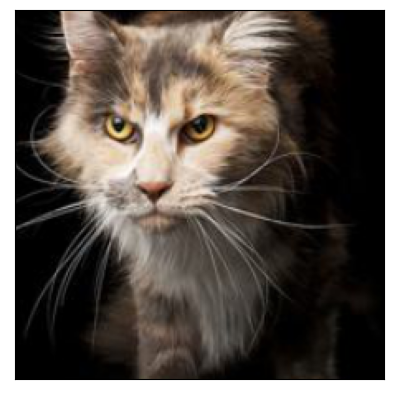

In [15]:
from torch.autograd import Variable

image_path = test_dir + "/gatto/ea37b40b2cf3003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg"
probs, classes = predict(image_path, model_select.to(device))
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
#trans_reverse = {v:k for k, v in translate.items()}
print("prob: ", probs)
print("class index: ", classes)
print("class: ", translate[class_names[classes[0]]])